# `Explaining Logistic Regression`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# Purpose & Outcome:

+ Cover the theory of Logistic Regression and get a feel of the underworkings
+ Some plotting and examples to help 

[stats book](https://mregresion.files.wordpress.com/2012/08/agresti-introduction-to-categorical-data.pdf) | [great lecture notes: UCLA](http://web.cs.ucla.edu/~yzsun/classes/2018Fall_CS145/Discussion/Discussion_Week2.pdf)

# `Let me know if there are any videos you would like to see.`


# <font color=red>Check me out on Buy Me A Coffee:</font> `@mrfugudatasci`

`--------------------------------`

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
%matplotlib inline

# `Background:`

+ `Logistic (Logit) regression` is used for `Classification`. We showed an example of this in the previous notebook (*`skLearn_01`*) where we looked for Ham/Spam for sms messages. 

+ You are trying to estimate the probability that some instance, belongs to a particular class. 

    + Using logistic regression, you are preserving the marginal probabilities of training data.
    + You are also using the coefficients to aide in detecting what input variables are important. 

`--------------------------------------`

**But, why not use `Linear Regression`?**

+ In order to use `Linear Regression` we would have to create a threshold for the classification. 
    + This is a problem if we are only trying to do a (Pass/Fail).
    + Unbounded results; unlike when using logistic which are [0:1]
        + Hmm, what does that mean?
            * Well: Linear regression will have an instance where the values are > 1 or <0. 
    + Outliers, are a problem because they will change the best fit line and increase error.


# `Differences:`

+ `Linear Regression:`
    * Fits a line, to the points (data) which can be used to estimate/predicate a new value
    

+ `Logistic Regression:`
    * fits a line to best separate between classes

`--------------------------------------`


We can connect Linear Regression to Logistic Regression:

+ We are taking the labels and finding a predicted label and output a probability

<font size=4>$y= \widehat y$</font>, meaning (y) predicted, y= class label

+ Using the sigma function we can take the linear regression and comfort to the range of [0,1] 

<font size=4>$\widehat y = sigma function(\beta_o +\beta_1x_1+\beta_2x_2+...) \rightarrow \widehat y \in [0,1]$</font>

+ We can equate the $(\beta_o +\beta_1x_1+\beta_2x_2+...)$ as the distribution perpendicular to the line for our decision boundary. This means that the points residing in our plot are separated by a descision boundary.
    + The points will be separated by a distance perpendicular to that line. 
    + That distance is therefore, giving a probability to a class or not. 
        + The farther they are from that line (decision boundary), the higher the probability toward that class label.

<img src="dist_perp.png">

# `What are we trying to find?`

+ The parameters "coefficients" <font size=5>$\beta$</font> are estimated using one of two methods:

    * `Least Squares Optimization:` using iterative approach [IRWLS](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares) 
    * `Max Likelihood Estimation` 
    

    
# `What Are We Exactly Calculating with Logistic Regression?`

+ `You are computing a weighted sum of input features, plus a bias 'intercept' term`
    + There is one coefficient per input.
    
`Starting from Linear Regression`: we have our hypothesis <font size=4>f ($x_i$)</font> representing the predicted response for the <font size=4>$i^{th}$</font> oberservation of <font size=4>$x_i$</font>.

<font size=5>$P(X) =f(x_i) = \hat{Y} = \beta_0 + \beta_1x_{i1}+ \beta_2x_{i2}+...+\beta_m x_{im}$</font>

`At this point the output would be a (real) value, not a class label`.

`-----------------------------`

# Here comes the `Logistic Function` (*sigmoid function*)

`Logistic Function:` <font size=5>$f(x) = \frac{1}{(1 + e^{-x})}$</font>

For input <font size=4>( x )</font> we will replace with the weighted sum


<font size=5>$f(x) = \frac{1}{(1 + e^{- (\beta_o +\beta x)})}$</font>

`------------------------------`


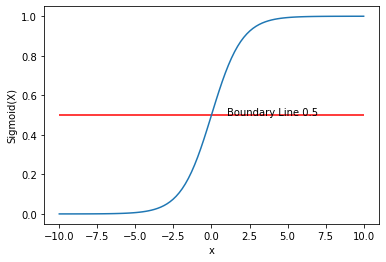

In [2]:
# Plot sigmoid
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
plt.hlines(y=.5, xmin=-10, xmax=10, colors='red', linestyles='solid')
plt.text(1,0.5,'Boundary Line 0.5')
plt.show() 

# We are trying to find the best parameters for our example: from the family of logistics
<img src="log_reg_fam.png">

[source](https://www.sjsu.edu/faculty/guangliang.chen/Math251F18/lec5logistic.pdf)

# `What we would like is to fit a line to these data:`

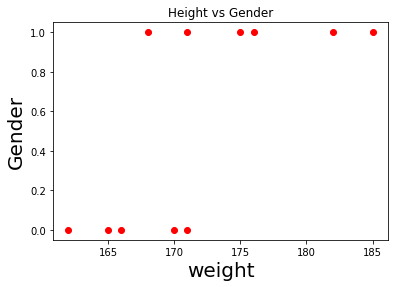

In [3]:
     
height = np.transpose(np.array([[162, 165, 166, 170, 171, 168, 171, 175, 176,
182, 185]]))
y = np.transpose(np.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]))
plt.xlabel("weight",fontsize=20) 
plt.ylabel("Gender",fontsize=20) 
plt.plot(height,y,'ro')
plt.title('Height vs Gender')
plt.show()


# Now, we have to get the `Log-Odds:`

+ Think of when you did an introduction to probability and were introduced to gambling: (wins:loses) ratio.

We can convert that to a probability of success 'your odds': <font size=5>$\frac{P}{1-P}$</font>

`And to get the log-odds for success:` <font size=5>$log(\frac{P}{1-P})$</font>

Now we will plug this into our logistic function from above:

<font size=5>$log(\frac{P}{1-P}) = \beta_o +\beta X$</font>

<font size=5>$\frac{P}{1-P} = e^{\beta_o +\beta X}$</font>

`-------------------------------`


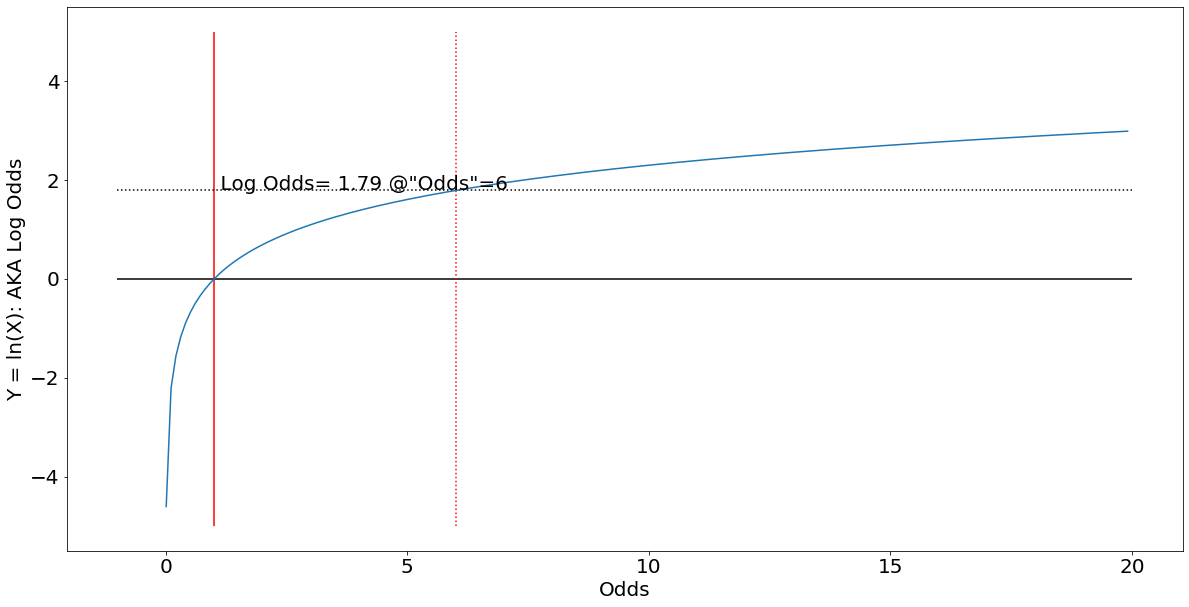

In [4]:
# Log Odds:


x = np.arange(0.01,20,0.1)
y = np.log(x)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.vlines(x=1,ymin=-5,ymax=5, colors='red', linestyles='solid')
plt.hlines(y=0,xmin=-1,xmax=20, colors='black', linestyles='solid')
plt.xlabel("Odds",size=20) 
plt.ylabel("Y = ln(X): AKA Log Odds",size=20) 

plt.vlines(x=6,ymin=-5,ymax=5, colors='red', linestyles='dotted')
plt.hlines(y=np.log(6),xmin=-1,xmax=20, colors='black', linestyles='dotted')
plt.text(1,np.log(6),' Log Odds= 1.79 @"Odds"=6',size=20)
plt.plot(x,y)
plt.show()



# `Let's Have fun and do some interpreting:`

In [5]:
log_odds_=np.log(6)
print('Log-Odds ln(x); when Odds = 6: returns %.2f' % log_odds_)
print('--------------------')
print('')
print('--------------------')
prob_=1 / (1 + np.exp(-np.log(6)))
print('Probability when you convert Log-Odds value 1 / (1 + np.exp(-np.log(6)))= %.2f'
      % prob_ )
print('--------------------')
print('')
odds_ = 0.7/.3
print("If Prob. = 0.7, let's find the Odds-ratio (P/(1-P)) = (%.2f : 1)" % odds_)
print('you will have a 2.33 to 1 chance')

Log-Odds ln(x); when Odds = 6: returns 1.79
--------------------

--------------------
Probability when you convert Log-Odds value 1 / (1 + np.exp(-np.log(6)))= 0.86
--------------------

If Prob. = 0.7, let's find the Odds-ratio (P/(1-P)) = (2.33 : 1)
you will have a 2.33 to 1 chance


# In `Logistic Regression` the dependent variable is the Logit:

<font size=5>$Log(Odds) = logit(P) = ln(\frac{P}{1-P})$</font>

Therefore the odds is a function of probability of getting a 1.

`-------------------------------`

# `How about we use an example to clarify`

`Ex.) Among men 40 years old, the odds of acting weird before the age of 50 are 2X's greater for never married men.`

<font size=5>$\frac{'oddsOfBeingWeird Given Never Married '}{odds Of Weird Being Married} =2$</font>


<font size=5>$\frac{'oddsOfBeingWeird Given Never Married '}{odds Of Weird Being Married} = \frac{e^{\beta_0}e^{\beta_1}}{e^{\beta_0}} = e^{\beta_1}$</font>

| **`Group`**         	|   X	| `Odds Weird`               	|
|---------------	|---	|--------------------------	|
| Never Married 	| 1 	| <font size=4>$e^{\beta_0}e^{\beta_1}$</font> 	|
| Married       	| 0 	| <font size=4>$e^{\beta_0}$</font>            	|


# `Therefore, when we increase` <font size=5>$x_k$</font> `by 1 unit then the odds variable` <font size=5>$e^{\beta_k}$</font> `is multiplied by Y=1. with all other independent variables held constant.`

`----------------------------------------`

# `Before we go further let's get some insight:`

if we take the right hand side of the equation and set to <font size=5>$\sum\limits^{K}_{j=0}e^{b_jx_j}$</font> noticing that we have <font size=5>$\prod\limits^{K}_{j=0}e^{b_jx_j} $</font>

+ **Notice** that you have a `multiplicative effect instead of additive like linear regression`

**Ex.)** 
Now, let's give $b_j=0.789$, and set $x_j=1$ then we end up with 2.201
Therefore, we would end up with each value odds for our response ($e^{b_j}$) being True will (Increase/Decrease) as $x_j$ increase 1 unit.

Here, we noticed a doubling effect.

`If you were using` $x_j$ `as some value such as months, or years then for each time interval of (x) you will double the odds of the response being true.` (All other things being held constant!)

`ex.) if the categories were: Rich/Poor and encoded (Rich=1,Poor=0) then we would have if the response was Rich; twice as likely or being true (all other things being constant)`

`---------------------------------`

<font size=5>$\frac{P}{1-P} = e^{\beta_o +\beta X}$</font>

<font size=5>$P = e^{\beta_o +\beta X}(1-P)$</font>

`Substitute`

<font size=5>$P = e^{\beta_o +\beta X}-P(e^{\beta_o +\beta X})$</font>

`move to other side`

<font size=5>$P + P(e^{\beta_o +\beta X})= e^{\beta_o +\beta X}$</font>

`combine`

<font size=5>$P(1 + e^{\beta_o +\beta X})=e^{\beta_o +\beta X}$</font>

`move to other side`

<font size=5>$P = \frac{e^{\beta_o +\beta X}}{(1 + e^{\beta_o +\beta X})}$</font>

`equate 1 to exp. form`

<font size=5>$P = \frac{e^{\beta_o +\beta X}}{\frac{e^{\beta_o +\beta X}}{e^{\beta_o +\beta X}}+ e^{\beta_o +\beta X}}$</font>

`pull out common term and cancel`

<font size=5>$P = \frac{e^{\beta_o +\beta X}}{e^{\beta_o +\beta X}[{\frac{1}{e^{\beta_o +\beta X}}+1}]}$</font>

<font size=5>$P(X) = \frac{1}{(1 + e^{- (\beta_o +\beta X)})}$</font>

**Note:** if the log-odds are linearly related to capital (X), then the relation between X and P are nonlinear. Then you will have the S-curve we had above.

+ The **decision boundary:**
    * $\beta_o +\beta x=0$ will be your solution to the separating line for the predicted classes.
    * Distance between the decision line is: <font size=5>$\frac{\beta_o}{||\beta||}+x\frac{\beta}{||\beta||}$</font>
    
    
**`Logistic Regression WILL tell you where the boundary is between classes as well as the dependence of class probability boundaries`**

[ex. and help](http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html)

`----------------------------------`

**`We are trying to use the separation boundary to classify. The likelihood estimation will be maximized so we can get the best separation between class`**

<img src="decision_bndry.png">

[source](https://github.com/DrIanGregory/MachineLearning-LogisticRegressionWithGradientDescentOrNewton)

`--------------`

# `Decision Boundary:`

Understand that the properties of the decision boundary are `generated from the hypothesis`, not the dataset. This means that for instance:

**$h_o(x)= g(\beta_0+x \beta_1+x_2\beta_2)$**

we would be able to take this had some $\beta=\begin{pmatrix} -5 \\ 1 \\ 1 \end{pmatrix}$

**and we were predicting that y=1**, then $-5+x_1+x_2>=0$ becomes $x_1+x_2>=5$


+ **`Decission Boundary Consideration:`** Ideally, you aim for `Recall & Precision = 1`
    * `Low Recall: High Precision:` situation where you may want to `reduce number of false positives without adjusting false negaitives` you will choose a value with either a `High Recall or Low Precision`.
        + This can occur in situations where you have adevertising and you want to make a clear, positive impression.  
    * `Low Precision: High Recall:` opposite of above.
        + Think of falsly labeling someone with cancer as not having cancer.
        
[source](https://www.geeksforgeeks.org/understanding-logistic-regression/)

# `Important:`

**`Understand, that we are trying to find our parameters in order to create that decision boundary. That is what the next steps are for!`**

+ we want the best predicted weights $\beta_o,\beta_1,...$ such that the p(x) will be as close as possible to the response y:label.

    * To get the best weights, we can do log-likelihood estimation (*maximize*)

[source](https://realpython.com/logistic-regression-python/)


# ` Likelihood:`

+ Since, `logistic regression` predicts probabilities and not just classes; we can use the likelihood.

**Before we get started** we will need the `Bernoulli Trials` <font size=5>$p(x_i)^{y_i}(1-p(x_i))^{1-y_i}$</font>

where:
* <font size=4>$x_i =$ vector of features</font>
* <font size=4>$y_i =$ class labels</font>


<font size=5>$Y_i =\{^{p=1}_{1-p=0}$</font>

`Likelihood, with Bernoulli trials:`
<font size=5>$L(\beta_o,\beta) = \prod\limits_{i=1}^n P(x_i)^{y_i}(P(x_i)^{1-y_i})$</font>

* The `Likelihood:` is the conditional probability of getting the values we observed, as a function of $\beta 's$

    * your given some data ($y_i$) which is a function of the parameters $\beta$ here

`--------------------------------------------------`

[Bernoulli/Binomial Review](http://galton.uchicago.edu/~eichler/stat22000/Handouts/l12.pdf)

In [6]:
# ex.) 
print('Given a class (0,1) labeled (y) and some probability yhat:')
print('-------------')


def likelihood(y, yhat):
    return yhat * y + (1 - yhat) * (1 - y)
 
# test for y=1
y, yhat = 1, 0.8
print('y=%.1f, yhat=%.1f, likelihood: %.2f' % (y, yhat, likelihood(y, yhat)))
y, yhat = 1, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.2f' % (y, yhat, likelihood(y, yhat)))
# test for y=0
y, yhat = 0, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.2f' % (y, yhat, likelihood(y, yhat)))
y, yhat = 0, 0.8
print('y=%.1f, yhat=%.1f, likelihood: %.2f' % (y, yhat, likelihood(y, yhat)))

# adapted from: 
# https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/

Given a class (0,1) labeled (y) and some probability yhat:
-------------
y=1.0, yhat=0.8, likelihood: 0.80
y=1.0, yhat=0.1, likelihood: 0.10
y=0.0, yhat=0.1, likelihood: 0.90
y=0.0, yhat=0.8, likelihood: 0.20


# `Log-Likelihood:`

* We want to maximize the `log-likelihood` with respect to the $\beta's$ 

    + `side note`: Using Sums vs Multiplications are easier to calculate/compute
    + There are benefits with plotting and concavity as well when you are reaching the max
 
`Log-Likelihood:` <font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i log(P(x_i)) + \sum\limits_{i=1}^{n} (y_i-1)log(1-P(x_i))$</font>


<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i log(P(x_i))+\sum\limits_{i=1}^{n} log(P(1-x_i))- y_ilog(P(1-x_i))$</font>

`--------------------`

`Manipulate logs:`

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i log(\frac{P(x_i)}{1-P(x_i)})+log(1-P(x_i)))$</font>

`--------------------`

`Substitute:` <font size=5>$log(\frac{P(x_i)}{1-P(x_i)}) = \beta_o+x\beta$</font>

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i (\beta_o+x\beta)+log(1-P(x_i)))$</font>

`--------------------`

`Substitute:` $P(x_i)$, also pay attention to the signs!

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i (\beta_o+x\beta)-log(1+e^{\beta_o+x\beta}))$</font>


`------------------------------------------`

# `Training our data:`

**That is where the** `Cost Function` **comes into play: aims to estimate $\beta$** 

+ **`Since the log-likelihood estimates the MAX and we want the MIN we need to put a (-) in front of it`**

+ Since logistic regression estimates probabilities and makes predictions; we will use the $\beta$ so that the model will estimate high probabilities for $y=1$ and low probalilities of $y=0$. 


<font size=5>$Y_i =\{^{-log(P(x)), y=1}_{(-log(1-P(x)),y=0}$</font>


[source](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html#logisticregression_model_estimated_probability_vectorized_form) | [source2](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)



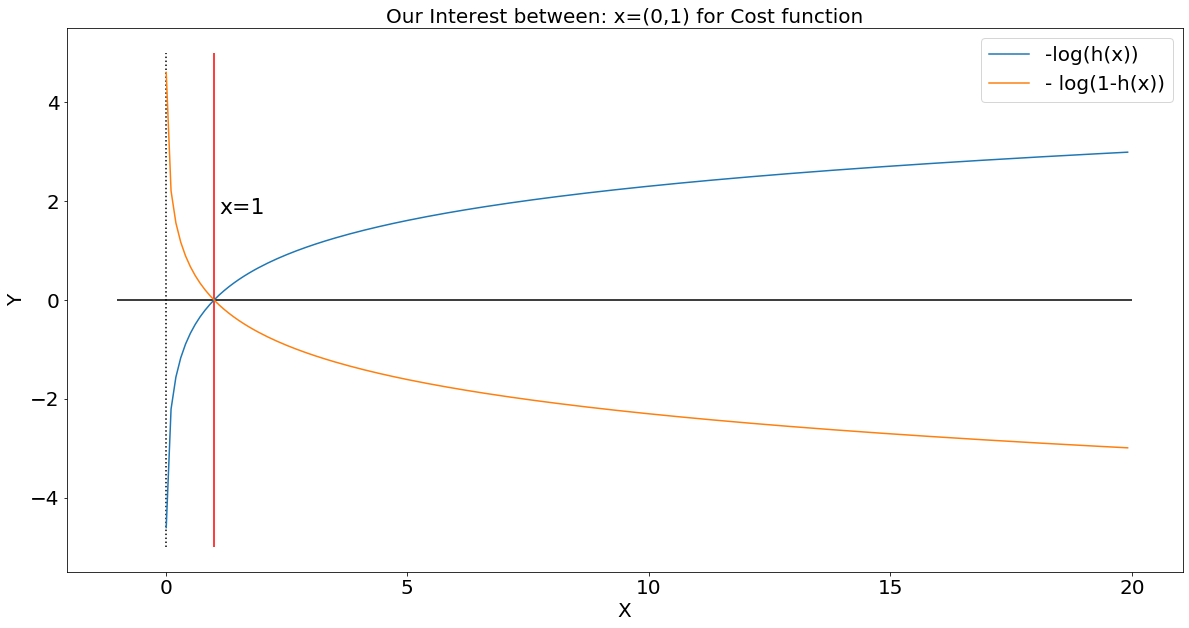

In [7]:
x = np.arange(0.01,20,0.1)
y = np.log(x)
y_ = -np.log(x)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.vlines(x=1,ymin=-5,ymax=5, colors='red', linestyles='solid')
plt.text(1.1,1.75,'x=1',size=22)
plt.hlines(y=0,xmin=-1,xmax=20, colors='black', linestyles='solid')
plt.xlabel("X",size=20) 
plt.ylabel("Y",size=20) 
plt.plot(x,y,label='-log(h(x))')
plt.plot(x,-y,label='- log(1-h(x))')
plt.vlines(x=0,ymin=-5,ymax=5, colors='black', linestyles='dotted')
plt.title('Our Interest between: x=(0,1) for Cost function',fontsize=20)
plt.legend(fontsize=20)
plt.show()


# `Y=1` which is $-log(h(x))$

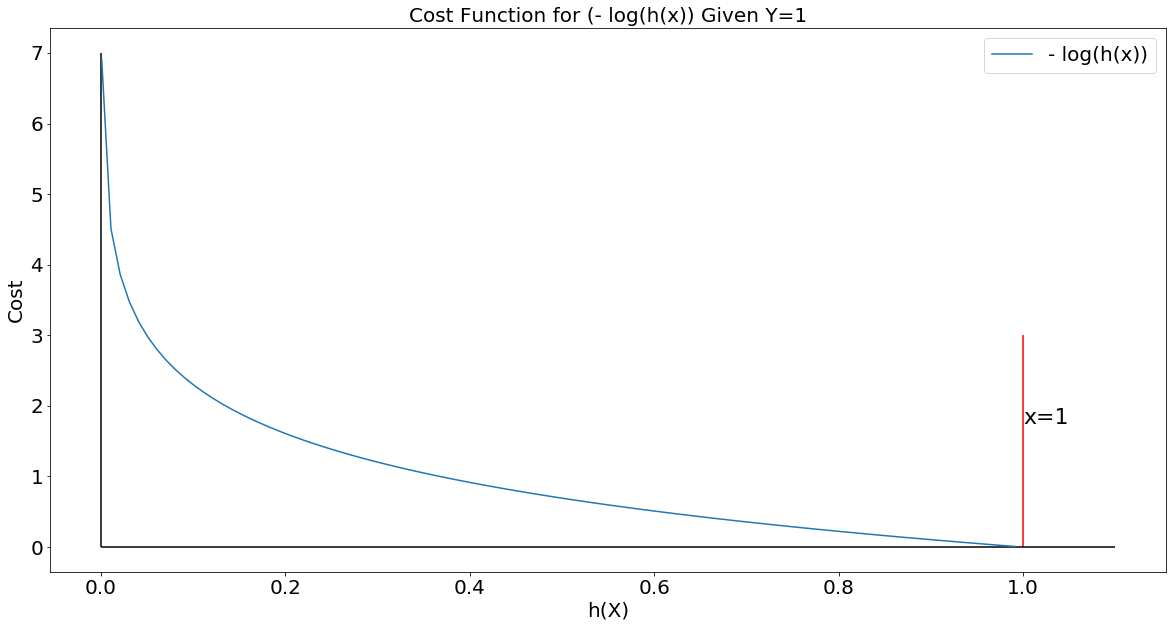

In [8]:
x = np.arange(0.001,1,0.01)
y = -np.log(x)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.vlines(x=1,ymin=0,ymax=3, colors='red', linestyles='solid')
plt.text(1,1.75,'x=1',size=22)
plt.hlines(y=0,xmin=0,xmax=1.1, colors='black', linestyles='solid')
plt.vlines(x=0,ymin=0,ymax=7, colors='black', linestyles='solid')
plt.xlabel("h(X)",size=20) 
plt.ylabel("Cost",size=20) 
plt.plot(x,y,label='- log(h(x))')
plt.title("Cost Function for (- log(h(x)) Given Y=1",fontsize=20)
plt.legend(fontsize=20)
plt.show()

+ `If y=1 then the` $Cost(h(x),y)= - log(h(x))$, then P(x)=1 and Cost =0

+ `If y=0` then the cost will be quite high and explode, P(x)=0, y=0, and high cost.

where X is our $\bar{Y}$

This is saying that if we predict 1, given that y=1 then the cost is zero.

`---------------------`

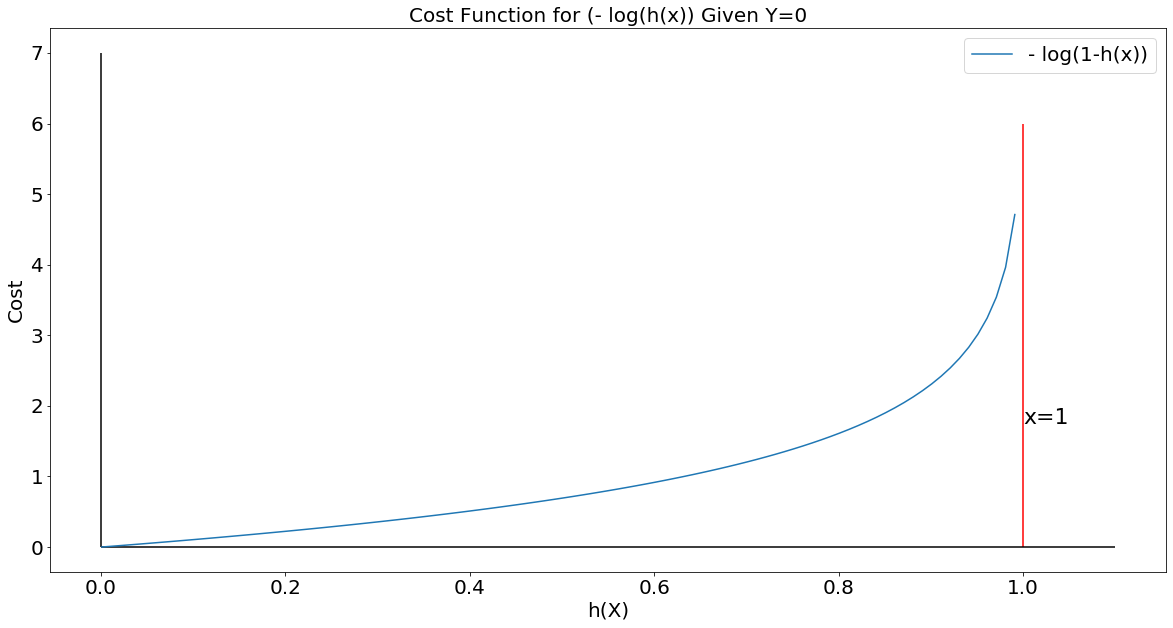

In [9]:
x = np.arange(0.001,1,0.01)
y = -np.log(1-x)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.vlines(x=1,ymin=0,ymax=6, colors='red', linestyles='solid')
plt.text(1,1.75,'x=1',size=22)
plt.hlines(y=0,xmin=0,xmax=1.1, colors='black', linestyles='solid')
plt.vlines(x=0,ymin=0,ymax=7, colors='black', linestyles='solid')
plt.xlabel("h(X)",size=20) 
plt.ylabel("Cost",size=20) 
plt.plot(x,y,label='- log(1-h(x))')
plt.title("Cost Function for (- log(h(x)) Given Y=0",fontsize=20)
plt.legend(fontsize=20)
plt.show()

# `This is telling us:` if y=0,which is $-log(h(1-x))$

+ IF y=0 and we predicted 0, then the cost is 0.

+ But, if y=0 and we predicted 1, then the cost is quite high and explodes.

`------------------------------`

# `Now what?`

+ **`Well, we have the log-likelihood but, we would like to maximize this. But, unfortunately we are unable to go directly to finding derivatives w.r.t parameters.`** 

*`This is not a closed form solution, and we need to use approximation methods:`*

# `Choose one:`

`such as` 

* **`Gradient Descent`**
* **`Newton-Raphson`**
* `Other Iterative approaches`
* `Cross Entropy`

We want to use optimization (cost function) to do this

`Gradient Descent:` can have some issues that need to be considered; for instance you can get stuck in a local minima with nonlinear functions.

# `Newton-Raphson:` is a root finding algorithm

+ Since, we can't use the dirivative and set to zero let's get on with this!

Take the log-likelihood from above:

<font size=5>$l(\beta_o,\beta) = \sum\limits_{i=1}^{n} y_i (\beta_o+x\beta)-log(1+e^{\beta_o+x\beta})$</font>

The **`Newton-Raphson Equation (1 iteration!):`** <font size=5>$\beta_{i+1}=\beta_i-\frac{f'(\beta_i)}{f''(\beta_i)}$</font>

`Take first partial derivatives w.r.t parameters:`

<font size=5>$\frac{\partial l}{\partial \beta_1} = - \sum\limits_{i=1}^{n}\frac{1}{1+e^{\beta_o+x_i\beta_1}}x_i e^{\beta_o+\beta_1x_i}+ \sum\limits_{i=1}^{n}y_ix_i$</font>

`Let's do some substitution here:`

<font size=5>$\frac{\partial l}{\partial \beta_1} = - \sum\limits_{i=1}^{n}P(x_i) x_i+  \sum\limits_{i=1}^{n}y_ix_i$</font>

`Combine terms and bring out sum:`

<font size=5>$\frac{\partial l}{\partial \beta_1} = \sum\limits_{i=1}^{n} x_i(y_i - P(x_i)) $</font>

`Now We need the Second Partial Derivative:`

<font size=5>$\frac{\partial^2 l}{\partial \beta_1 \beta_o} = - \sum\limits_{i=1}^{n}x_{i,o}(\frac{e^{\beta_o+\beta_{1,x_i}}}{1+e^{\beta_o+\beta_{1,x_i}}})(\frac{1}{1+e^{\beta_o+\beta_{1,x_i}}}) x_{i,1}$</font>


<font size=5>$\frac{\partial^2 l}{\partial \beta_1 \beta_o} = \sum\limits_{i=1}^{n} x_{i,o} x_{i,1} P(x_i)(1-P(x_i))$ </font>

`--------------------------------`

**`This is 1 iteration only!`**

Let us generalize each of the partials:

<font size=5>$\frac{\partial l}{\partial \beta_j} = \sum\limits_{i=1}^{n} x_j(y_i - P(x_ij)) $</font>

<font size=5>$\frac{\partial^2 l}{\partial \beta_j \beta_k} = \sum\limits_{i=1}^{n} x_{i,j} x_{i,k} P(x_i)(1-P(x_i))$ </font>


Then you would have to take these and combine:

<font size=5>$\beta*=\beta_j-\frac{\frac{\partial l}{\partial \beta_j}}{\frac{\partial^2 l}{\partial \beta_j \beta_k}}$</font>


[computational considerations](https://sites.stat.washington.edu/mmp/courses/stat535/fall15/Handouts/l3slides-training.pdf) | [derivation](https://whyml.wordpress.com/tag/logistic-regression/) | [derivation and thesis: explained logist regression](https://mds.marshall.edu/cgi/viewcontent.cgi?article=2169&context=etd)
# `Now we have went in 1D, and 1 iteration: But, ....What if we want to go in multiple dimensions/variables?`

`-------------------------`

CHECK THESE OUT FOR HELP:

[more than 1 variable derivation](http://www.cs.columbia.edu/~amoretti/smac_04_tutorial.html) | [ex more than 1 variable](http://web.cs.ucla.edu/~yzsun/classes/2018Fall_CS145/Discussion/Discussion_Week2.pdf) | [Suppl. text as well](https://www.statlect.com/fundamentals-of-statistics/logistic-model-maximum-likelihood) | [more help](http://www.cs.columbia.edu/~amoretti/smac_04_tutorial.html) | [alt help](http://fourier.eng.hmc.edu/e176/lectures/NM/node21.html)

# `Here is Multiple Dimensions of Newton-Raphson: (Optimization)`

Since we are starting from the knowledge of:

This is for 1D:

The **`Newton-Raphson Equation (1 iteration!):`** <font size=5>$\beta_{i+1}=\beta_i-\frac{f'(\beta_i)}{f''(\beta_i)}$</font>

We want `Multiple Dimensions`: therefore we will use the Taylor expansion second order, with Hessian and Gradient.

`Let me show you something to let this resonate and make sense:`

If we simplify the Taylor Expansion to: <font size=4>$f(\beta_{x+1})\simeq f(\beta_o)+(\beta_{i+1}-\beta_o)f'(x_o)$</font>

with some shuffling:

<font size=5>$\beta_{i+1}=\beta_o-\frac{f(\beta_o)}{f'(\beta_o)}$</font>

**or**

<font size=5>$ \beta_{i+1}=\beta_o-\frac{f'(\beta_o)}{f''(\beta_o)}$</font>

The distinction is that the first one will use a tangent line crossing the x-axis and that will be your next point to start. The seond one will use a function 'parabola' curve to approximate and it will instead use the minimum for its point to move to next location.

`Here is what we want in the end from all the math:`

# `Answer:` $\beta_{i+1}=\beta_o -H(\beta_o)^{-1} \triangledown f(\beta_o)$

# `Lets visualize what is happending with Newton-Raphson` for a few iterations if you were using a cost function

[Source of plots](http://www.cs.columbia.edu/~amoretti/smac_04_tutorial.html)

<img src="iter_NR.png">

# Alternate way is plotting:

+ using a quadratic which will do the same thing; except for each iteration the minimum of the function will be used for next moving point instead of where the point crosses the axis.

# The parameters that are found here:

are able to be placed back into your equation and used to find your probabilities 

# `What is the take away?`

+ Each iteration will approach the min. for the cost function
+ You are trying to find the best fit, the parameters that are found will be those!
+ Take those parameters and put them into your function and then you will be able to best estimate your given data.

+ You can then make predictions based on these parameters using your data and find out how well your actual data, measuare against your predictions by accuracy, recall, precision etc.

In [27]:
# import statsmodels.api as sm
# from sklearn import linear_model


x_ = np.transpose(np.array([[162, 165, 166, 170, 171, 168, 171, 175, 176,
182, 185]]))
x = sm.add_constant(x_)
y=np.array([0,0,0,0,0,1,1,1,1,1,1])
result=sm.Logit(y,x)
mod=result.fit(method='newton')
print('params',mod.params)
print('predicted_prob',mod.predict(x))

Optimization terminated successfully.
         Current function value: 0.345900
         Iterations 8
params [-84.83310945   0.49853544]
predicted_prob [0.01678456 0.07078045 0.11142901 0.47949025 0.60263354 0.25366578
 0.60263354 0.91763145 0.9482958  0.99726897 0.99938664]


In [28]:
x_ = np.transpose(np.array([[162, 165, 166, 170, 171, 168, 171, 175, 176,
182, 185]]))

predicted_probs=[]
log_odds_=[]
odds_scale=[]
for i in x_:
    log_odds_.append(-84.833+.4985*i)
    odds_scale.append(np.exp(-84.833+.4985*i))
    predicted_probs.append(np.exp(-84.833+.4985*i)/(1+np.exp(-84.833+.4985*i)))

# http://www.pmean.com/13/predicted.html (math motivation)
# https://aaronschlegel.me/newtons-method-equation-roots.html (good example worked)

In [29]:

print('log_odds:',log_odds_)
print('--------------------------------')
print('odds:',odds_scale)
print('---------------------------------')
print('predicted_prob:',predicted_probs)
print('---------------------------------')

log_odds: [array([-4.076]), array([-2.5805]), array([-2.082]), array([-0.088]), array([0.4105]), array([-1.085]), array([0.4105]), array([2.4045]), array([2.903]), array([5.894]), array([7.3895])]
--------------------------------
odds: [array([0.01697523]), array([0.07573613]), array([0.1246806]), array([0.91576088]), array([1.50757138]), array([0.33790179]), array([1.50757138]), array([11.07289245]), array([18.22874967]), array([362.85380061]), array([1618.89646231])]
---------------------------------
predicted_prob: [array([0.01669188]), array([0.070404]), array([0.11085868]), array([0.47801419]), array([0.60120776]), array([0.25256098]), array([0.60120776]), array([0.91716981]), array([0.94799454]), array([0.99725164]), array([0.99938268])]
---------------------------------


In [56]:
#confusion matrix:
mod.pred_table()

# now you can take the 4+5=9 therefore 90% accuracy btw

array([[4., 1.],
       [1., 5.]])

In [85]:
# Now with SkLearn:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0).fit(x_, y)
print('coeff:beta',model.coef_)
print('intercept',model.intercept_)
print('predicted_labels',model.predict(x_))
print('actual_labels',y)
print('accuracy',model.score(x_,y))
print('confusion_mat',confusion_matrix(y, model.predict(x_)))

coeff:beta [[0.00223001]]
intercept [-0.14698449]
predicted_labels [1 1 1 1 1 1 1 1 1 1 1]
actual_labels [0 0 0 0 0 1 1 1 1 1 1]
accuracy 0.5454545454545454
confusion_mat [[0 5]
 [0 6]]


# `Gradient Descent vs Newton-Raphson`

**`Newton-Raphson:`**

+ Finds roots
+ converges quickly
+ when the second derivative is known, it computes quickly such as `logistic regression`
+ need to provide a starting point, this can be critical!
+ `Runtime:` $O(np(n+p)+P^3$)
+ `Memory used:` $O(p^2)$ for each iteration
+ Computationally intensive, but since you have low iterations it will converge (if it converges) faster than gradient descent
    + The second derivative is what helps convergence, because it is used for each step
+ Very large datasets can be a problem with computing the Hessian matrix.
    + To get around this you may decrease complexity/dimensions but result in more iterations
    + Paying attention to the Hessian matrix is important as well: make sure it is positive definite.

+ `When using sklearn`: consider using different solvers such as

`sklearn.linear_model.LogisticRegression and use solver: 'lbfgs'`

`----------------`

**`Gradient Descent:`**

+ finds the min/max using first derivative
+ Can be troublesome with finding local min/max
    + this can be combated using a random approach
+ parametric: we need to adjust parameters for hyper-tuning
+ `Runtime:` $O(np)$
+ `Memory:` $O(p)$

[Newton-Raphson vs Gradient Descent](https://medium.com/@papillonbee/logistic-regression-from-scratch-with-gradient-descent-and-newtons-method-ff4307e3cb30) | [Good background Training predictors](https://sites.stat.washington.edu/mmp/courses/stat535/fall15/Handouts/l3slides-training.pdf) | [worked ex. gradient descent](https://kseow.com/logisticregression.html)

`SOLVER Choices over Gradient Descent:`

+ `LBFGS,BFGS,Conjugate Gradient`
    * `Pros`:
        + Dont need to pick a parameter for learning rate
        + usually runs faster due to less iterations for exampl
        + can work out gradient, but there are some hiccups
    * `Cons`
        + Complex
        + Somewhat of a blackbox unless you know what your doing

# `Pros & Cons: Logistic Regression`

`Pros`

+ good because it classifies and returns probabilities as well

+ you are able to determine the relevance of a predictor by its sign and size which is good for interpreting and training. 


`Cons`

+ Potential overfitting with large datasets, use of regularization terms should be considered

+ perfect separation is a problem if two classes could be completely separated. Machine learning isn't needed in this scenario. But, adding penalized terms to the weights or prior probabilities weights.

[source](https://www.knowledgehut.com/blog/data-science/logistic-regression-for-machine-learning)

# <font color=red>LIKE</font>, Share & 

# <font color=red>SUB</font>scribe

# Citations & Help

# ◔̯◔


https://medium.com/@lily_su/log-linear-regression-85ed7f1a8f24

https://realpython.com/logistic-regression-python/ (very good code examples)

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

https://www.kdnuggets.com/2019/05/modeling-price-regularized-linear-model-xgboost.html

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/blob/master/Logistic_Regression.ipynb

https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/ (good overall concept explanation)

https://thelaziestprogrammer.com/sharrington/math-of-machine-learning/solving-logreg-newtons-method (code and plots)

http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11LogisticRegression.pdf

`Newton-Raphson vs Gradient Descent`

https://www.datasciencecentral.com/profiles/blogs/difference-between-gradient-descent-and-newton-raphson

https://www.baeldung.com/cs/gradient-descent-vs-newtons-gradient-descent

https://medium.com/@papillonbee/logistic-regression-from-scratch-with-gradient-descent-and-newtons-method-ff4307e3cb30

`Math`

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/40%20LogisticRegression.pdf

https://win-vector.com/2011/09/14/the-simpler-derivation-of-logistic-regression/

https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf

http://personal.psu.edu/jol2/course/stat597e/notes2/logit.pdf

https://www.kaggle.com/hamzafar/derivation-in-context-of-logistic-regression

http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11LogisticRegression.pdf

https://whyml.wordpress.com/tag/logistic-regression/

https://whyml.wordpress.com/2016/05/10/logistic-regression-part-1/

https://www.youtube.com/watch?v=2GrfaB88w4M


https://ethen8181.github.io/machine-learning/text_classification/logistic.html

https://www.sjsu.edu/faculty/guangliang.chen/Math251F18/lec5logistic.pdf

`Plotting`

http://www.cs.columbia.edu/~amoretti/smac_04_tutorial.html

https://medium.com/@papillonbee/logistic-regression-from-scratch-with-gradient-descent-and-newtons-method-ff4307e3cb30

https://www.kaggle.com/elyas19/implement-logistic-regression-from-scratch

https://github.com/DrIanGregory/MachineLearning-LogisticRegressionWithGradientDescentOrNewton

http://people.duke.edu/~ccc14/sta-663-2016/13_Optimization.html

https://www.knowledgehut.com/blog/data-science/logistic-regression-for-machine-learning

http://yukiyanai.github.io/teaching/rm1/contents/R/logistic-regression-2.html (rstudio log regr. good example)

https://beckernick.github.io/logistic-regression-from-scratch/

https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/

https://www.kaggle.com/jeppbautista/logistic-regression-from-scratch-python

https://rickwierenga.com/blog/ml-fundamentals/logistic-regression.html

`Decision Boundary`

https://www.jeremyjordan.me/logistic-regression/

https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

https://online.stat.psu.edu/stat508/lesson/9/9.1

`Newton-Raphson Theory Help:`

https://people.duke.edu/~ccc14/sta-663/MultivariateOptimizationAlgortihms.html

https://relate.cs.illinois.edu/course/cs357-f15/file-version/03473f64afb954c74c02e8988f518de3eddf49a4/media/cs357-slides-newton2.pdf

https://www.stat.cmu.edu/~ryantibs/convexopt-S15/lectures/14-newton.pdf

https://www.youtube.com/watch?v=sAT3mNr0TBg

https://www.youtube.com/watch?v=42zJ5xrdOqo

https://jermwatt.github.io/machine_learning_refined/notes/4_Second_order_methods/4_4_Newtons.html